<a href="https://colab.research.google.com/github/Rodolfoohl/CAGEDFEV2025/blob/main/CAGEDFEV2025PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Helper functions for database access

The notebook now uses `connect` and `get_first_table_name` from `db_utils.py`.

```python
from db_utils import connect, get_first_table_name

with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    table_name = get_first_table_name(conn)
    # use conn here
```

Using `connect` ensures the SQLite connection is closed automatically.


In [2]:
from db_utils import connect, get_first_table_name

with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    print(cursor.fetchall())


[('CAGEDMOV202502',)]


In [3]:
# prompt: verificar o nome das colunas

from db_utils import connect, get_first_table_name

with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name (replace 'your_table_name' with the actual table name)
    tables = cursor.fetchall()
    
    for table_name in tables:
      table_name = table_name[0]
      # Get column names for the table
      cursor.execute(f"PRAGMA table_info({table_name});")
      columns = cursor.fetchall()
      print(f"Columns for table '{table_name}':")
      for column in columns:
        print(column[1]) # column[1] contains the column name
      print("---")
    


Columns for table 'CAGEDMOV202502':
field1
field2
field3
field4
field5
field6
field7
field8
field9
field10
field11
field12
field13
field14
field15
field16
field17
field18
field19
field20
field21
field22
field23
field24
field25
field26
field27
field28
field12_float
---


In [61]:
# prompt: visualize as cinco primeiras linhas

import pandas as pd
from db_utils import connect, get_first_table_name

# Mostrar todas as colunas no output
pd.set_option('display.max_columns', None)

# Conectar ao banco de dados
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Obter os nomes das tabelas
    
    # Iterar pelas tabelas e exibir as 5 primeiras linhas
    for (table_name,) in tables:
        try:
            df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", conn)
            print(f"\nFirst 5 rows of table '{table_name}':")
            print(df)
        except Exception as e:
            print(f"Error reading table '{table_name}': {e}")
    



First 5 rows of table 'CAGEDMOV202502':
           field1  field2 field3     field4 field5     field6  \
0  competênciamov  região     uf  município  seção  subclasse   
1          202502       4     41     410840      M    7112000   
2          202502       2     29     290320      G    4781400   
3          202502       2     26     261160      G    4781400   
4          202502       3     33     330455      I    5620102   

              field7           field8     field9          field10 field11  \
0  saldomovimentação  cbo2002ocupação  categoria  graudeinstrução   idade   
1                 -1           715315        101                7      33   
2                  1           521110        101                7      22   
3                  1           763015        101                7      55   
4                  1           513405        101                7      46   

            field12  field13 field14         field15              field16  \
0  horascontratuais  raçacor

In [5]:
# prompt: count numero de frequencia do cbo 1111-10

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count the frequency of CBO 1111-10
        query = f"""
            SELECT COUNT(*)
            FROM {table_name}
            WHERE field8 = '1111-10';
        """
        cursor.execute(query)
        frequency = cursor.fetchone()[0]
        print(f"The CBO '1111-10' appears {frequency} times.")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


The CBO '1111-10' appears 0 times.


In [62]:
# prompt: quantidade de linhas

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    tables = cursor.fetchall()
    
    for table_name in tables:
      table_name = table_name[0]
      try:
        # Get the number of rows in the table
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        row_count = cursor.fetchone()[0]
        print(f"Table '{table_name}' has {row_count} rows.")
        print("---")
      except Exception as e:
        print(f"Error getting row count for table '{table_name}': {e}")
    


Table 'CAGEDMOV202502' has 4726185 rows.
---


In [7]:
# prompt: qual é a diferença entre field21 e field28

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name (assuming only one table, adjust if needed)
    
    # Query the database to compare 'field21' and 'field28'
    try:
      df = pd.read_sql_query(f"SELECT field21, field28 FROM {table_name}", conn)
      print(df.head(100000)) # Display first 10000 rows for comparison
    
      # Example of further analysis
      print("\nSummary statistics:")
      print(df.describe())
    
      print("\nData types:")
      print(df.dtypes)
    
    
      print("\nMissing Values:")
      print(df.isnull().sum())
    
    
    except Exception as e:
      print(f"Error comparing fields: {e}")
    


       field21           field28
0      salário  valorsaláriofixo
1      2752.20           2752,20
2      1518.00           1518,00
3      2500.00           2500,00
4         0.00              0,00
...        ...               ...
99995  1790.00           1790,00
99996  1537.00           1537,00
99997  2300.00           2300,00
99998  1518.00           1518,00
99999  1518.00           1518,00

[100000 rows x 2 columns]

Summary statistics:
        field21  field28
count   4726185  4726177
unique   275288   267443
top     1518.00  1518,00
freq     549029   535799

Data types:
field21    object
field28    object
dtype: object

Missing Values:
field21    0
field28    8
dtype: int64


In [8]:
# prompt: analisando a tabela toda, quantos numeros é diferente entre field21 e field28

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name (assuming only one table, adjust if needed)
    
    try:
      # Query the database to count differences between 'field21' and 'field28'
      cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field21 <> field28")
      different_count = cursor.fetchone()[0]
      print(f"Number of rows where 'field21' and 'field28' are different: {different_count}")
    
    except Exception as e:
      print(f"Error comparing fields: {e}")
    


Number of rows where 'field21' and 'field28' are different: 4726177


In [9]:
# prompt: gerar uma visualização das primeiras 500 linhas

import pandas as pd
from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name (assuming only one table, adjust if needed)
    
    try:
        # Read the first 500 rows of the table into a pandas DataFrame
        df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 500", conn)
    
        # Display the DataFrame
        print(df)
    
    except Exception as e:
        print(f"Error reading table '{table_name}': {e}")
    


             field1  field2 field3     field4 field5     field6  \
0    competênciamov  região     uf  município  seção  subclasse   
1            202502       4     41     410840      M    7112000   
2            202502       2     29     290320      G    4781400   
3            202502       2     26     261160      G    4781400   
4            202502       3     33     330455      I    5620102   
..              ...     ...    ...        ...    ...        ...   
495          202502       4     41     410690      H    4930202   
496          202502       3     33     330455      N    8121400   
497          202502       4     42     421700      M    6920601   
498          202502       4     41     411460      G    4541206   
499          202502       3     35     350570      J    6202300   

                field7           field8     field9          field10  ...  \
0    saldomovimentação  cbo2002ocupação  categoria  graudeinstrução  ...   
1                   -1           715315    

Salary Distribution:
salary_category
1001-2000     57.873658
2001-5000     34.012606
0-1000         4.803559
5001-10000     2.388778
10001+         0.921399
Name: proportion, dtype: float64


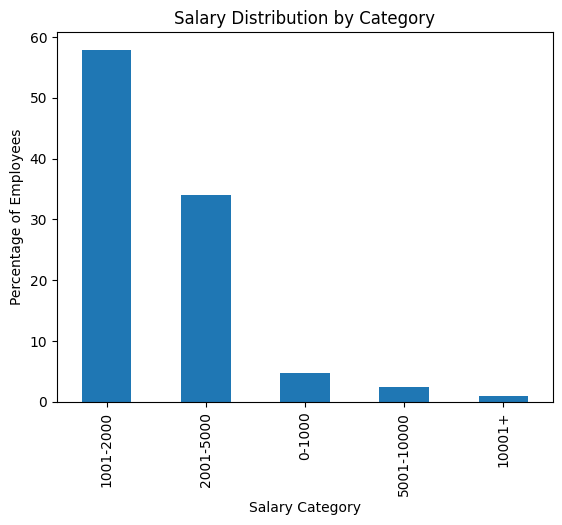

In [10]:
# prompt: poderia gerar uma analise da distribuicao de salarios entre faixas

import pandas as pd
from db_utils import connect, get_first_table_name
import matplotlib.pyplot as plt

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Assuming 'field21' represents salary, adjust if needed
        df = pd.read_sql_query(f"SELECT field21 FROM {table_name}", conn)
    
        # Rename the salary column for clarity
        df = df.rename(columns={'field21': 'salary'})
    
        # Handle potential non-numeric values
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary'])
    
        # Define salary bins (adjust these as needed)
        bins = [0, 1000, 2000, 5000, 10000, float('inf')]  # Example bins
        labels = ['0-1000', '1001-2000', '2001-5000', '5001-10000', '10001+']
    
        # Create the salary category safely using .loc
        df.loc[:, 'salary_category'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)
    
        # Analyze the distribution
        salary_distribution = df['salary_category'].value_counts(normalize=True) * 100
    
        print("Salary Distribution:")
        print(salary_distribution)
    
        # Visualization (optional)
        salary_distribution.plot(kind='bar')
        plt.title('Salary Distribution by Category')
        plt.xlabel('Salary Category')
        plt.ylabel('Percentage of Employees')
        plt.show()
    
    except Exception as e:
        print(f"Error analyzing salary distribution: {e}")
    
    
    


In [69]:
import sqlite3
import pandas as pd

DB_PATH = '/content/drive/MyDrive/Files/basefev25.db'

# Configuração de exibição
pd.set_option('display.max_columns', None)

# Faixas e rótulos salariais
BINS   = [0, 1000, 2000, 5000, 10000, float('inf')]
LABELS = ['0-1000', '1001-2000', '2001-5000', '5001-10000', '10001+']

def main(db_path):
    # Conecta e identifica a tabela
    conn = sqlite3.connect(db_path)
    table = conn.execute(
        "SELECT name FROM sqlite_master WHERE type='table';"
    ).fetchone()[0]

    # Carrega e limpa dados
    df = pd.read_sql_query(
        f"SELECT field7 AS movimentacao, field21 AS salary FROM {table}",
        conn
    ).dropna()
    conn.close()

    # Converte tipos e filtra apenas admissões (1) e demissões (–1)
    df['movimentacao'] = pd.to_numeric(df['movimentacao'], errors='coerce').astype('Int64')
    df['salary']       = pd.to_numeric(df['salary'], errors='coerce')
    df = df.dropna(subset=['movimentacao', 'salary'])
    df = df[df['movimentacao'].isin([-1, 1])]

    # Categoriza salário
    df['salary_category'] = pd.cut(df['salary'], bins=BINS, labels=LABELS, right=False)

    # Gera crosstab e calcula saldo
    quadro = pd.crosstab(df['salary_category'], df['movimentacao'])
    quadro = quadro.reindex(LABELS, fill_value=0)
    quadro['saldo'] = quadro.get(1, 0) - quadro.get(-1, 0)

    # Exibe resultado
    print("\nQuadro Comparativo de Movimentação por Faixa Salarial (com Saldo):")
    print(quadro)

if __name__ == '__main__':
    main(DB_PATH)




Quadro Comparativo de Movimentação por Faixa Salarial (com Saldo):
movimentacao          -1        1   saldo
salary_category                          
0-1000             90932   136087   45155
1001-2000        1225767  1509448  283681
2001-5000         751736   855762  104026
5001-10000         55842    57056    1214
10001+             22829    20717   -2112


In [11]:
print(df.shape)  # Quantas linhas no total
print(df['salary'].isna().sum())  # Quantos salários nulos



(4726183, 2)
0


In [72]:
# prompt: quantidade de slarios acima de 100000

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name (assuming only one table, adjust if needed)
    
    try:
        # Query the database to count salaries above 100,000
        # Assuming 'field21' is the salary column
        query = f"""
            SELECT COUNT(*)
            FROM {table_name}
            WHERE field21 > 100000;
        """
        cursor.execute(query)
        salaries_above_100k = cursor.fetchone()[0]
    
        print(f"Quantidade de salários acima de 100000: {salaries_above_100k}")
    
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
    
    finally:


Quantidade de salários acima de 100000: 4659711


In [12]:
# prompt: qual é a quantidade de linhas que o field21  salary é maior que 100000

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for rows where 'field21' (salary) is greater than 10000
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field21 > 1000000")
        row_count = cursor.fetchone()[0]
        print(f"Number of rows where 'field21' (salary) is greater than 10000: {row_count}")
    
    except Exception as e:
        print(f"Error counting rows: {e}")
    


Number of rows where 'field21' (salary) is greater than 10000: 4659699


In [13]:
# prompt: verifique a quantidade de field21 que seja entre 5000 a 10000

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for rows where 'field21' is between 5000 and 10000
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field21 BETWEEN 5000 AND 10000")
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field21' is between 5000 and 10000: {count}")
    
    except Exception as e:
        print(f"Error counting rows: {e}")
    


Number of rows where 'field21' is between 5000 and 10000: 0


In [14]:
# prompt: quantidade de linhas na tabela

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Execute a query to get the number of rows
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        num_rows = cursor.fetchone()[0]
        print(f"The table '{table_name}' has {num_rows} rows.")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


The table 'CAGEDMOV202502' has 4726185 rows.


In [15]:
# prompt: quantidade de linhas diferente de nulo no field28

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for non-null values in 'field28'
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field28 IS NOT NULL")
        non_null_count = cursor.fetchone()[0]
        print(f"Number of rows with non-null values in 'field28': {non_null_count}")
    
    except Exception as e:
        print(f"Error counting non-null values: {e}")
    
    finally:


Number of rows with non-null values in 'field28': 4726177


In [16]:
# prompt: quantidade de valores do field28 que sao maiores de 10000,00

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for values in 'field28' greater than 10000
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field28 > 10000.00")
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field28' is greater than 10000.00: {count}")
    
    except Exception as e:
        print(f"Error counting rows: {e}")
    
    finally:


Number of rows where 'field28' is greater than 10000.00: 4631802


In [17]:
# prompt: quantidade de valores do field28 que sao maiores de 1000

from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for values in 'field28' greater than 1000
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field28 > 1000.00")
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field28' is greater than 1000: {count}")
    
    except Exception as e:
        print(f"Error counting rows: {e}")
    
    finally:


Number of rows where 'field28' is greater than 1000: 4633385


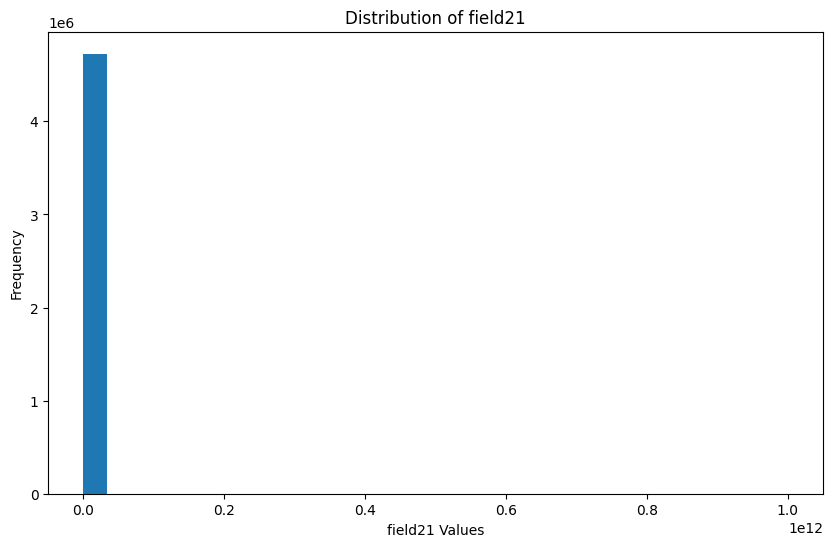

count    4.726183e+06
mean     2.140354e+05
std      4.599861e+08
min      0.000000e+00
25%      1.556240e+03
50%      1.814400e+03
75%      2.228000e+03
max      1.000000e+12
Name: field21_values, dtype: float64


In [18]:
# prompt: qual é a distribuição do field21

from db_utils import connect, get_first_table_name
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Read 'field21' into a pandas DataFrame
        df = pd.read_sql_query(f"SELECT field21 FROM {table_name}", conn)
        df = df.rename(columns={'field21': 'field21_values'})
    
        # Convert to numeric, handling errors
        df['field21_values'] = pd.to_numeric(df['field21_values'], errors='coerce')
    
        # Drop rows with NaN values after conversion
        df.dropna(subset=['field21_values'], inplace=True)
    
        # Analyze and visualize the distribution
        plt.figure(figsize=(10, 6))  # Adjust figure size if needed
        plt.hist(df['field21_values'], bins=30)  # Adjust number of bins as needed
        plt.xlabel('field21 Values')
        plt.ylabel('Frequency')
        plt.title('Distribution of field21')
        plt.show()
    
        #Descriptive Statistics
        print(df['field21_values'].describe())
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [19]:
# prompt: qual é o conteúdo da coluna salário

# Connect to the database
from db_utils import connect, get_first_table_name
import pandas as pd
import matplotlib.pyplot as plt
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Assuming 'field21' represents salary, adjust if needed
        df = pd.read_sql_query(f"SELECT field21 FROM {table_name}", conn)
    
        # Print the content of the 'field21' column (salary)
        print(df)
    
    except Exception as e:
        print(f"Error analyzing salary distribution: {e}")
    
    finally:


                                                   field21
0                                                  salário
1                                                  2752.20
2                                                  1518.00
3                                                  2500.00
4                                                     0.00
...                                                    ...
4726180                                            4250.00
4726181                                            1265.00
4726182                                             694.50
4726183                                            1821.60
4726184  1                                             ...

[4726185 rows x 1 columns]


In [20]:
# prompt: qual é a frequência de  1518,00 na coluna field21

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query the database for the frequency of 1518.00 in 'field21'
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE field21 = 1518.00")
        frequency = cursor.fetchone()[0]
        print(f"The frequency of 1518.00 in 'field21' is: {frequency}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


The frequency of 1518.00 in 'field21' is: 0


In [21]:
# prompt: como saber de está trabalhando com a versão da memória

import psutil

# Get memory information
mem = psutil.virtual_memory()

# Print total memory
print(f"Total memory: {mem.total / (1024**3):.2f} GB")

# Print available memory
print(f"Available memory: {mem.available / (1024**3):.2f} GB")

# Print used memory percentage
print(f"Used memory percentage: {mem.percent}%")

# Print other memory details
mem


Total memory: 12.67 GB
Available memory: 10.77 GB
Used memory percentage: 15.0%


svmem(total=13608370176, available=11563765760, percent=15.0, used=1709064192, free=5127213056, active=1446936576, inactive=6696419328, buffers=410439680, cached=6361653248, shared=2125824, slab=224165888)

In [23]:
import pandas as pd
from db_utils import connect, get_first_table_name

# Conectando ao banco
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Rodando a query, corrigindo vírgula para ponto e convertendo para número
    query = """
    SELECT *
    FROM CAGEDMOV202502
    WHERE CAST(REPLACE(field21, ',', '.') AS REAL) > 10000;
    """
    
    # Lendo o resultado da query direto no Pandas
    df_result = pd.read_sql_query(query, conn)
    
    # Mostrando o resultado
    print(df_result.head())
    


   field1 field2 field3  field4 field5   field6 field7  field8 field9 field10  \
0  202502      3     35  355670      C  2062200     -1  252210    101      80   
1  202502      1     13  130260      E  3600601      1  123110    101      80   
2  202502      3     33  330455      J  6203100     -1  212405    101      80   
3  202502      2     24  240325      P  8513900      1  333110    101       7   
4  202502      2     29  291920      P  8591100     -1  142105    101       7   

   ... field20   field21 field22 field23 field24 field25 field26 field27  \
0  ...       9  24122.36       7       0       1  202502       0       5   
1  ...       0  15493.62       7       0       1  202502       0       5   
2  ...       0  11586.62       7       0       1  202502       0       5   
3  ...       0  14995.20       5       0       1  202502       0       1   
4  ...       0  20000.00       3       0       1  202502       0       5   

    field28 field12_float  
0  24122,36          44.0  


In [24]:
# prompt: qual é o nome da tabela

from db_utils import connect, get_first_table_name

with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    if table_name:
      print(table_name[0])
    else:
      print("No tables found in the database.")
    


CAGEDMOV202502


In [25]:
# prompt: qual é o tipo de dado no field21

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Get the data type of 'field21'
        cursor.execute(f"PRAGMA table_info({table_name})")
        columns = cursor.fetchall()
        for col in columns:
            if col[1] == 'field21':
                print(f"Data type of field21: {col[2]}")
                break
        else:
            print("field21 not found in the table.")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Data type of field21: TEXT


In [26]:
# prompt: neste database qual field representa ocupacao

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Get column information
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
    
        # Find the column representing occupation (you might need to adjust the name)
        occupation_column = None
        for col in columns:
            if 'ocupacao' in col[1].lower() or 'cargo' in col[1].lower(): # Look for keywords related to occupation
                occupation_column = col[1]  # col[1] is the column name
                break
    
        if occupation_column:
            print(f"The field representing occupation is: {occupation_column}")
        else:
            print("No field clearly representing occupation was found.")
    
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


No field clearly representing occupation was found.


In [27]:
# prompt: verificar qual tipo de dado é o field21 na linha 50

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Get the data type of 'field21' at row 50
        cursor.execute(f"SELECT typeof(field21) FROM {table_name} LIMIT 49,1") #row 50 is index 49
        data_type = cursor.fetchone()[0]
        print(f"Data type of field21 at row 50: {data_type}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Data type of field21 at row 50: text


In [28]:
# prompt: como transformar text em float64 no field21

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Update the table to convert 'field21' to float64
        cursor.execute(f'''
            UPDATE {table_name}
            SET field21 = REPLACE(field21, ',', '.');
        ''')
    
        # Commit the changes to the database
        conn.commit()
    
        # Verify the update (optional)
        df = pd.read_sql_query(f"SELECT field21 FROM {table_name} LIMIT 5", conn)  # Read first 5 rows
        print(df)
        print(df.dtypes)  # Check the data type of the 'field21' column
    
    
    except Exception as e:
        print(f"An error occurred: {e}")
        conn.rollback()  # Roll back changes in case of error
    
    finally:


   field21
0  salário
1  2752.20
2  1518.00
3  2500.00
4     0.00
field21    object
dtype: object


In [29]:
# prompt: qual é a distribuição salarial no field21, colocar num quadro, exemplo 0 a 1000 10%, 1001 a 2000 12% assim por diante, e no quadro também apresentar o número da frequencia e na ultima linha a soma. Para gerar isso, filtrar apenas field7 igual 1
# poderia usar esta parte do codigo
# bins = [0, 1000, 1500, 2000, 3000, 4000, 5000, 7000, 10000, 15000, float('inf')]
# labels = ['0-1000', '1001-1500', '1501-2000', '2001-3000', '3001-4000', '4001-5000',
#           '5001-7000', '7001-10000', '10001-15000', '15001+']
# df['salary_category'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)

import pandas as pd
from db_utils import connect, get_first_table_name
import matplotlib.pyplot as plt

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Read data into a pandas DataFrame, filtering for field7 == 1
        query = f"""
        SELECT field21
        FROM {table_name}
        WHERE field7 = 1;
        """
        df = pd.read_sql_query(query, conn)
        df = df.rename(columns={'field21': 'salary'})
    
        # Convert salary to numeric, handling errors
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary'])
    
        # Define salary bins and labels
        bins = [0, 1000, 1500, 2000, 3000, 4000, 5000, 7000, 10000, 15000, float('inf')]
        labels = ['0-1000', '1001-1500', '1501-2000', '2001-3000', '3001-4000', '4001-5000',
                  '5001-7000', '7001-10000', '10001-15000', '15001+']
        df['salary_category'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)
    
        # Calculate the distribution
        salary_distribution = df['salary_category'].value_counts(normalize=True) * 100
        frequency = df['salary_category'].value_counts()
    
        # Create the summary table
        summary_table = pd.DataFrame({'Range': labels,
                                     'Percentage': salary_distribution,
                                     'Frequency': frequency})
        summary_table = summary_table.fillna(0) # fill NaN with 0
        summary_table.loc['Total'] = summary_table.sum()
        summary_table.loc['Total', 'Range'] = 'Total'
    
        print(summary_table)
    
    except Exception as e:
        print(f"Error: {e}")
    
    finally:


                       Range  Percentage  Frequency
salary_category                                    
1501-2000             0-1000   55.068300    1420250
2001-3000          1001-1500   25.557623     659149
3001-4000          1501-2000    5.434091     140149
0-1000             2001-3000    5.276592     136087
1001-1500          3001-4000    3.458534      89198
4001-5000          4001-5000    2.189316      56464
5001-7000          5001-7000    1.508645      38909
7001-10000        7001-10000    0.703626      18147
10001-15000      10001-15000    0.441361      11383
15001+                15001+    0.361913       9334
Total                  Total  100.000000    2579070


field7_values
 1.0         54.6%
-1.0         45.4%
 521140.0     0.0%
 101.0        0.0%
 22.0         0.0%
Name: proportion, dtype: object


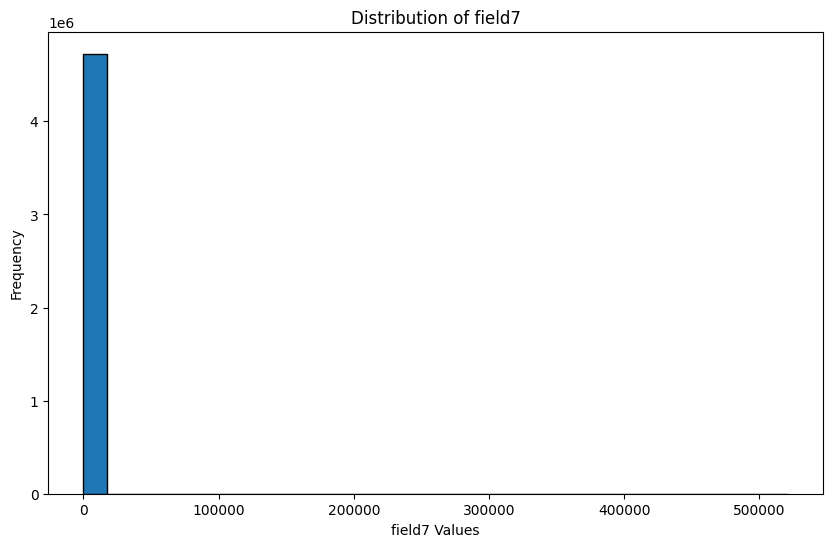

In [30]:
# prompt: qual é a distribuição entre do field 7 coloque num quadro

import pandas as pd
from db_utils import connect, get_first_table_name
import matplotlib.pyplot as plt

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Read 'field7' into a pandas DataFrame
        df = pd.read_sql_query(f"SELECT field7 FROM {table_name}", conn)
        df = df.rename(columns={'field7': 'field7_values'})
    
        # Convert to numeric, coercing errors to NaN
        df['field7_values'] = pd.to_numeric(df['field7_values'], errors='coerce')
    
        # Drop rows with NaN values
        df.dropna(subset=['field7_values'], inplace=True)
    
        # Display the distribution in a table
        print(df['field7_values'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    
    
        # Optional: Create a histogram for visualization
        plt.figure(figsize=(10, 6))
        plt.hist(df['field7_values'], bins=30, edgecolor='black')  # Adjust number of bins as needed
        plt.xlabel('field7 Values')
        plt.ylabel('Frequency')
        plt.title('Distribution of field7')
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [31]:
# prompt: qual é a quantidade de pessoas que recebe exatamente 5000 no field21

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Execute the query to count occurrences of 5000 in 'field21'
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field21, ',', '.') AS REAL) = 5000;")
        count = cursor.fetchone()[0]
        print(f"Number of people with exactly 5000 in 'field21': {count}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of people with exactly 5000 in 'field21': 7290


In [32]:
# prompt: criar quadro com o numero de frequencia de horas contratuais field12

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count the frequency of each value in 'field12'
        query = f"SELECT field12, COUNT(*) AS frequency FROM {table_name} GROUP BY field12;"
        df_frequency = pd.read_sql_query(query, conn)
    
        # Display the frequency table
        print(df_frequency)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


               field12  frequency
0                 0,00        136
1                 0,01         84
2                 0,02         10
3                 0,04          1
4                 0,05          2
...                ...        ...
3680              9,92          4
3681              9,96          1
3682              9,97          2
3683              9,98          1
3684  horascontratuais          1

[3685 rows x 2 columns]


In [33]:
# prompt: qual é o tipo de dado do field12

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Get the data type of 'field12'
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        for col in columns:
            if col[1] == 'field12':
                print(f"Data type of field12: {col[2]}")
                break
        else:
            print("field12 not found in the table.")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Data type of field12: TEXT


In [34]:
# prompt: converta o field12 para numero

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Convert 'field12' to numeric, handling errors
        # The specific conversion method depends on the actual data in 'field12'.
        # If it's a string representation of a number, you might need to remove commas or other non-numeric characters
        # and convert to a numeric type using pd.to_numeric
    
        query = f"""
        SELECT field12
        FROM {table_name};
        """
        df = pd.read_sql_query(query, conn)
        df['field12'] = pd.to_numeric(df['field12'], errors='coerce')  # Convert to numeric, errors become NaN
    
        print(df.head()) # Check if the conversion worked correctly
    
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


   field12
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


In [35]:
# prompt: converta field12 para float64

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Convert 'field12' to float64 and update the table
        cursor.execute(f'''
            ALTER TABLE {table_name}
            ADD COLUMN field12_float REAL;
        ''')
        cursor.execute(f'''
            UPDATE {table_name}
            SET field12_float = REPLACE(field12, ',', '.');
        ''')
    
        conn.commit()
    
        print("field12 converted to float64 and saved as field12_float")
    
    except Exception as e:
        print(f"An error occurred: {e}")
        conn.rollback()
    
    finally:


An error occurred: duplicate column name: field12_float


               field12  frequency
0                 0,00        136
1                 0,01         84
2                 0,02         10
3                 0,04          1
4                 0,05          2
...                ...        ...
3680              9,92          4
3681              9,96          1
3682              9,97          2
3683              9,98          1
3684  horascontratuais          1

[3685 rows x 2 columns]


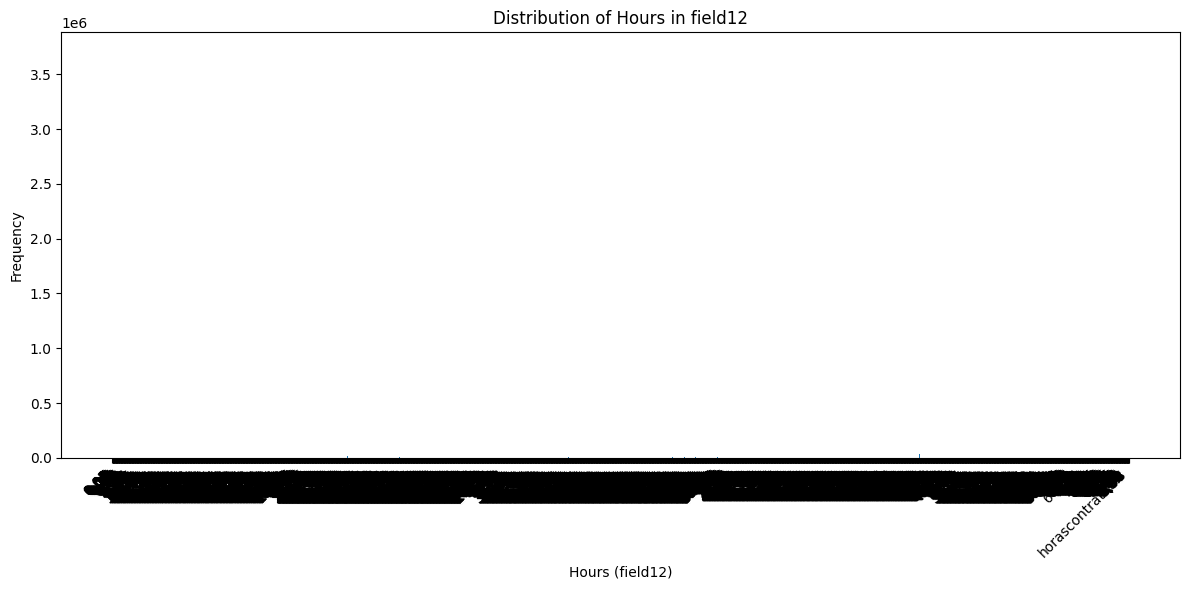

In [36]:
# prompt: gerar quadro de distribuicao de horas no field12

import pandas as pd
import matplotlib.pyplot as plt
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the distribution of hours in 'field12'
        query = f"""
        SELECT field12, COUNT(*) AS frequency
        FROM {table_name}
        GROUP BY field12
        ORDER BY field12;
        """
        df_distribution = pd.read_sql_query(query, conn)
    
        # Display the distribution
        print(df_distribution)
    
        # Create a bar plot for visualization
        plt.figure(figsize=(12, 6))
        plt.bar(df_distribution['field12'], df_distribution['frequency'])
        plt.xlabel('Hours (field12)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Hours in field12')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()
    
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [37]:
# prompt: no field12 quantos sao igual ou maior que 40 e qual é o percentual da tabela inteira

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count the number of rows where field12 is greater than or equal to 40
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field12, ',', '.') AS REAL) >= 40")
        count_greater_equal_40 = cursor.fetchone()[0]
    
        # Query to get the total number of rows in the table
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        total_count = cursor.fetchone()[0]
    
        # Calculate the percentage
        percentage = (count_greater_equal_40 / total_count) * 100 if total_count else 0
    
        print(f"Number of rows where 'field12' is greater than or equal to 40: {count_greater_equal_40}")
        print(f"Percentage of rows where 'field12' is greater than or equal to 40: {percentage:.2f}%")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field12' is greater than or equal to 40: 4146973
Percentage of rows where 'field12' is greater than or equal to 40: 87.74%


In [38]:
# prompt: no field12 quantos count igual ou maior que 44 e qual é o percentual da tabela inteira

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field12 is greater than or equal to 44
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field12, ',', '.') AS REAL) >= 44")
        count_greater_equal_44 = cursor.fetchone()[0]
    
        # Query for the total number of rows
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        total_count = cursor.fetchone()[0]
    
        # Calculate the percentage
        percentage = (count_greater_equal_44 / total_count) * 100 if total_count else 0
    
        print(f"Number of rows where 'field12' is greater than or equal to 44: {count_greater_equal_44}")
        print(f"Percentage of rows where 'field12' is greater than or equal to 44: {percentage:.2f}%")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field12' is greater than or equal to 44: 3821628
Percentage of rows where 'field12' is greater than or equal to 44: 80.86%


In [39]:
# prompt: no field12 quantos count igual ou maior que 50 e qual é o percentual da tabela inteira

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field12 is greater than or equal to 50
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field12, ',', '.') AS REAL) >= 50")
        count_greater_equal_50 = cursor.fetchone()[0]
    
        # Query for the total number of rows
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        total_count = cursor.fetchone()[0]
    
        # Calculate the percentage
        percentage = (count_greater_equal_50 / total_count) * 100 if total_count else 0
    
        print(f"Number of rows where 'field12' is greater than or equal to 50: {count_greater_equal_50}")
        print(f"Percentage of rows where 'field12' is greater than or equal to 50: {percentage:.2f}%")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field12' is greater than or equal to 50: 34552
Percentage of rows where 'field12' is greater than or equal to 50: 0.73%


In [40]:
# prompt: no field12 quantos count igual ou maior que 60 e qual é o percentual da tabela inteira

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field12 is greater than or equal to 60
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field12, ',', '.') AS REAL) >= 60")
        count_greater_equal_60 = cursor.fetchone()[0]
    
        # Query for the total number of rows
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        total_count = cursor.fetchone()[0]
    
        # Calculate the percentage
        percentage = (count_greater_equal_60 / total_count) * 100 if total_count else 0
    
        print(f"Number of rows where 'field12' is greater than or equal to 60: {count_greater_equal_60}")
        print(f"Percentage of rows where 'field12' is greater than or equal to 60: {percentage:.2f}%")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field12' is greater than or equal to 60: 609
Percentage of rows where 'field12' is greater than or equal to 60: 0.01%


In [41]:
# prompt: qual é o conteúdo da filed21

from google.colab import drive
from db_utils import connect, get_first_table_name
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the content of 'field21'
        query = f"SELECT field21 FROM {table_name};"  # Corrected query
        df_field21 = pd.read_sql_query(query, conn)
    
        # Display the content of 'field21'
        print(df_field21)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                   field21
0                                                  salário
1                                                  2752.20
2                                                  1518.00
3                                                  2500.00
4                                                     0.00
...                                                    ...
4726180                                            4250.00
4726181                                            1265.00
4726182                                             694.50
4726183                                            1821.60
4726184  1                                             ...

[4726185 rows x 1 columns]


In [42]:
# prompt: count field21 maior ou igual a 20000,

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field21 is greater than or equal to 20000
        cursor.execute(f"SELECT COUNT(*) FROM {table_name} WHERE CAST(REPLACE(field21, ',', '.') AS REAL) >= 20000")
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field21' is greater than or equal to 20000: {count}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field21' is greater than or equal to 20000: 11705


In [43]:
# prompt: count field21 seja igual e maior que 20000 e também field7 seja igual 1

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field21 >= 20000 and field7 == 1
        cursor.execute(f"""
            SELECT COUNT(*)
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) >= 20000
              AND field7 = 1;
        """)
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field21' is greater than or equal to 20000 and 'field7' is equal to 1: {count}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field21' is greater than or equal to 20000 and 'field7' is equal to 1: 5696


In [44]:
# prompt: count field21 seja igual e maior que 20000 e também field7 seja igual -1

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count rows where field21 >= 20000 and field7 == -1
        cursor.execute(f"""
            SELECT COUNT(*)
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) >= 20000
              AND field7 = -1;
        """)
        count = cursor.fetchone()[0]
        print(f"Number of rows where 'field21' is greater than or equal to 20000 and 'field7' is equal to -1: {count}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Number of rows where 'field21' is greater than or equal to 20000 and 'field7' is equal to -1: 6008


In [45]:
# prompt: me diga a frequencia dos valores da coluna field8, considerando apenas as linhas onde field21 é maior ou igual a 5000 e display a frequencia em ordem descrecente das primeiras 20 linhas. Some a frequencia dos valores da colina field8

import pandas as pd
from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the frequency of 'field8' where 'field21' >= 5000
        query = f"""
            SELECT field8, COUNT(*) AS frequency
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) >= 5000
            GROUP BY field8
            ORDER BY frequency DESC
            LIMIT 20;
        """
        df_frequency = pd.read_sql_query(query, conn)
    
        # Display the frequency table
        print(df_frequency)
    
        # Calculate the sum of frequencies
        total_frequency = df_frequency['frequency'].sum()
        print(f"\nTotal frequency of 'field8' values where 'field21' >= 5000 (top 20): {total_frequency}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


    field8  frequency
0   212405       7326
1   252105       3849
2   410105       3808
3   142105       3390
4   142330       3229
5   411010       3130
6   710205       2773
7   223505       2726
8   223405       2281
9   252210       2275
10  252405       2223
11  142305       2111
12  142335       1986
13  317110       1967
14  142320       1892
15  214205       1746
16  520110       1626
17  724315       1554
18  351605       1505
19  141205       1460

Total frequency of 'field8' values where 'field21' >= 5000 (top 20): 52857


In [46]:
# prompt: poderia demonstrar field8 no valor 212405  , quantos são 1 e quantos são -1 no field7

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count occurrences of field7 = 1 and field7 = -1 when field8 = 212405
        cursor.execute(f"""
            SELECT
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE field8 = 212405;
        """)
        result = cursor.fetchone()
        count_1 = result[0]
        count_minus_1 = result[1]
    
        print(f"For field8 = 212405:")
        print(f"Number of occurrences where field7 = 1: {count_1}")
        print(f"Number of occurrences where field7 = -1: {count_minus_1}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


For field8 = 212405:
Number of occurrences where field7 = 1: 5601
Number of occurrences where field7 = -1: 5327


In [47]:
# prompt: poderia demonstrar field8 252105   , quantos são 1 e quantos são -1 no field7

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count occurrences of field7 = 1 and field7 = -1 when field8 = 252105
        cursor.execute(f"""
            SELECT
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE field8 = 252105;
        """)
        result = cursor.fetchone()
        count_1 = result[0]
        count_minus_1 = result[1]
    
        print(f"For field8 = 252105:")
        print(f"Number of occurrences where field7 = 1: {count_1}")
        print(f"Number of occurrences where field7 = -1: {count_minus_1}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


For field8 = 252105:
Number of occurrences where field7 = 1: 6189
Number of occurrences where field7 = -1: 6481


In [48]:
# prompt: poderia demonstrar field8 no valor 212405  , quantos são 1 e quantos são -1 no field7

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count occurrences of field7 = 1 and field7 = -1 when field8 = 212405
        cursor.execute(f"""
            SELECT
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE field8 = 212405;
        """)
        result = cursor.fetchone()
        count_1 = result[0]
        count_minus_1 = result[1]
    
        print(f"For field8 = 212405:")
        print(f"Number of occurrences where field7 = 1: {count_1}")
        print(f"Number of occurrences where field7 = -1: {count_minus_1}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


For field8 = 212405:
Number of occurrences where field7 = 1: 5601
Number of occurrences where field7 = -1: 5327


In [49]:
# prompt: fazer uma analise descritiva no 212405 e fazer o display com apenas dois numeros depois do ponto e mostrar analise com quartil 99% e quartil 1%. Exlcuir quartil 1% e quartil99% da analise

import pandas as pd
from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to select field21 where field8 is 212405
        query = f"SELECT CAST(REPLACE(field21, ',', '.') AS REAL) FROM {table_name} WHERE field8 = 212405;"
        df_field21 = pd.read_sql_query(query, conn)
    
        # Rename the column for easier handling
        df_field21.columns = ['field21']
    
        # Remove NaN values
        df_field21.dropna(inplace=True)
    
        # Calculate descriptive statistics, excluding the top and bottom 1%
        lower_bound = df_field21['field21'].quantile(0.01)
        upper_bound = df_field21['field21'].quantile(0.99)
    
        filtered_df = df_field21[(df_field21['field21'] > lower_bound) & (df_field21['field21'] < upper_bound)]
    
        description = filtered_df.describe()
    
        # Display with two decimal places
        print(description.round(2))
    
        # Print quartiles explicitly
        print("\n99th Percentile:", df_field21['field21'].quantile(0.99))
        print("1st Percentile:", df_field21['field21'].quantile(0.01))
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


        field21
count  10697.00
mean    7835.83
std     4451.44
min     1518.27
25%     4026.13
50%     7027.79
75%    10745.77
max    22384.00

99th Percentile: 22481.51339999994
1st Percentile: 1518.0


In [50]:
# prompt: fazer uma analise descritiva do fiedl21. Considere todos os dados do field8. Fazer o display com apenas dois numeros depois do ponto e mostrar analise com quartil 99.9% e quartil 1%

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to select field21 and field8
        query = f"SELECT CAST(REPLACE(field21, ',', '.') AS REAL), field8 FROM {table_name};"
        df = pd.read_sql_query(query, conn)
    
        # Rename columns for clarity
        df.columns = ['field21', 'field8']
    
        # Handle potential errors during conversion (replace with appropriate handling for your data)
        df['field21'] = pd.to_numeric(df['field21'], errors='coerce')
        df.dropna(subset=['field21'], inplace=True)
    
        # Group data by 'field8' and get descriptive statistics for 'field21'
        grouped = df.groupby('field8')['field21'].agg(['count', 'mean', 'std', 'min', 'max', lambda x: x.quantile(0.01), lambda x: x.quantile(0.999)])
    
        # Rename the lambda functions for better readability
        grouped.rename(columns={'<lambda_0>': '1st_percentile', '<lambda_1>': '99.9th_percentile'}, inplace=True)
    
        # Display the results with two decimal places
        print(grouped.round(2))
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


                 count     mean      std      min       max  1st_percentile  \
field8                                                                        
101                  4     3.50     1.73     2.00      5.00            2.00   
10105               43  1871.70   464.38   828.00   3425.40         1117.80   
10110                1  1600.00      NaN  1600.00   1600.00         1600.00   
10115                1  1525.00      NaN  1525.00   1525.00         1525.00   
10205                4  1630.00     0.00  1630.00   1630.00         1630.00   
...                ...      ...      ...      ...       ...             ...   
992215             716  1753.06   239.03   912.50   3680.72         1496.71   
992220              87  2186.13   517.26    10.16   3300.00         1286.09   
992225           10104  1669.94   300.22     0.00   4000.00          282.87   
999999            1910  2431.33  2943.44     0.00  69000.00            0.00   
cbo2002ocupação      1     0.00      NaN     0.00   

In [51]:
# prompt: transforme field12 em float. fazer uma analise descritiva do field12

# Connect to the database
import pandas as pd
from db_utils import connect, get_first_table_name

with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get field12 as float
        query = f"SELECT CAST(REPLACE(field12, ',', '.') AS REAL) FROM {table_name};"
        df_field12 = pd.read_sql_query(query, conn)
    
        # Rename the column for easier handling
        df_field12.columns = ['field12']
    
        #Remove NaN values
        df_field12.dropna(inplace=True)
    
        # Descriptive analysis, excluding top and bottom 1%
        lower_bound = df_field12['field12'].quantile(0.01)
        upper_bound = df_field12['field12'].quantile(0.99)
        filtered_df = df_field12[(df_field12['field12'] > lower_bound) & (df_field12['field12'] < upper_bound)]
    
        description = filtered_df.describe()
    
        # Display with two decimal places
        print(description.round(2))
    
        # Print quartiles explicitly
        print("\n99th Percentile:", df_field12['field12'].quantile(0.99))
        print("1st Percentile:", df_field12['field12'].quantile(0.01))
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


          field12
count  4604815.00
mean        42.14
std          5.15
min         13.04
25%         44.00
50%         44.00
75%         44.00
max         47.97

99th Percentile: 48.0
1st Percentile: 13.0


     field12  frequency  percentage
0      44,00    3697659   78.237712
1      40,00     218990    4.633547
2      36,00     193754    4.099586
3      20,00      98023    2.074041
4      30,00      72043    1.524337
...      ...        ...         ...
3680    0,27          1    0.000021
3681    0,23          1    0.000021
3682    0,13          1    0.000021
3683    0,09          1    0.000021
3684    0,04          1    0.000021

[3685 rows x 3 columns]


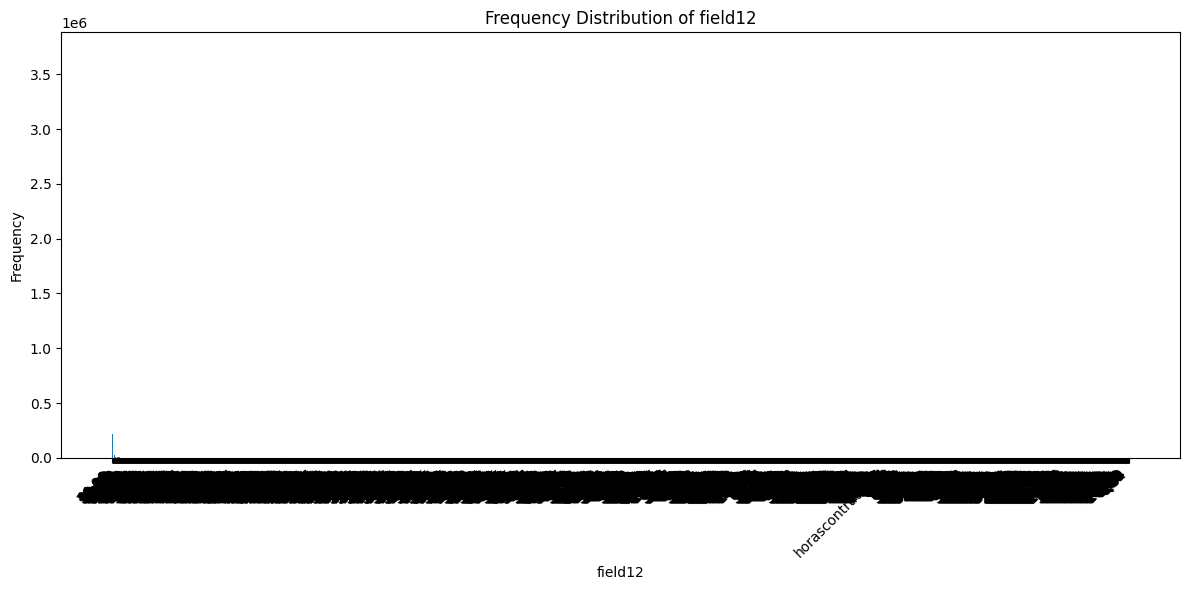

In [52]:
# prompt: demonstre a frequencia do field12. No quadro inclua quanto representa do total.

import pandas as pd
from db_utils import connect, get_first_table_name
import matplotlib.pyplot as plt

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the frequency of 'field12'
        query = f"""
            SELECT field12, COUNT(*) AS frequency, CAST(COUNT(*) AS REAL) * 100 / (SELECT COUNT(*) FROM {table_name}) AS percentage
            FROM {table_name}
            GROUP BY field12
            ORDER BY frequency DESC;
        """
        df_frequency = pd.read_sql_query(query, conn)
    
        # Display the frequency table
        print(df_frequency)
    
        # Create a bar plot for visualization
        plt.figure(figsize=(12, 6))
        plt.bar(df_frequency['field12'], df_frequency['frequency'])
        plt.xlabel('field12')
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of field12')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [53]:
# prompt: faça uma analise do field4

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to analyze 'field4' (replace with your desired analysis)
        # Example: Descriptive statistics for 'field4'
        query = f"SELECT field4 FROM {table_name};"
        df_field4 = pd.read_sql_query(query, conn)
    
        # Convert field4 to numeric, handling errors
        df_field4['field4'] = pd.to_numeric(df_field4['field4'], errors='coerce')
    
        # Remove rows with NaN values in 'field4'
        df_field4.dropna(subset=['field4'], inplace=True)
    
        # Calculate descriptive statistics
        description = df_field4['field4'].describe()
        print(description)
    
        # Example: Calculate the frequency of unique values in 'field4'
        frequency = df_field4['field4'].value_counts()
        print("\nFrequency of unique values:\n", frequency)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


count    4.726178e+06
mean     3.544445e+05
std      8.501324e+04
min      1.100010e+05
25%      3.143300e+05
50%      3.534400e+05
75%      4.118400e+05
max      9.999990e+05
Name: field4, dtype: float64

Frequency of unique values:
 field4
355030.0    491937
330455.0    160694
410690.0    109342
310620.0    103395
530010.0     80413
             ...  
240725.0         1
220785.0         1
251430.0         1
240870.0         1
210547.0         1
Name: count, Length: 5491, dtype: int64


In [54]:
# prompt: fazer um filtro do field4 selecinando o valor 355030. Faça uma analise descritiva

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Filter by field4 = 355030 and get descriptive statistics for other fields
        query = f"""
            SELECT *
            FROM {table_name}
            WHERE field4 = 355030;
        """
        df_filtered = pd.read_sql_query(query, conn)
    
        # Display the filtered data
        print("Data where field4 = 355030:")
        print(df_filtered)
    
        #Describe all numerical fields
        print("\nDescriptive statistics for numerical fields")
        print(df_filtered.describe(include='number'))
    
        # Example: Descriptive statistics for a specific numerical field (e.g., 'field21')
        # Convert 'field21' to numeric, handling errors
        df_filtered['field21'] = pd.to_numeric(df_filtered['field21'], errors='coerce')
    
        # Remove rows with NaN in field21
        df_filtered.dropna(subset=['field21'], inplace=True)
    
        if not df_filtered['field21'].empty:
          print("\nDescriptive statistics for field21:")
          print(df_filtered['field21'].describe())
        else:
          print("\nNo valid numeric data found for field21 after filtering")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


Data where field4 = 355030:
        field1 field2 field3  field4 field5   field6 field7  field8 field9  \
0       202502      3     35  355030      N  8220200      1  422310    101   
1       202502      3     35  355030      N  8121400     -1  514320    101   
2       202502      3     35  355030      F  4321500      1  514320    101   
3       202502      3     35  355030      S  9430800      1  513505    101   
4       202502      3     35  355030      N  7820500      1  784205    106   
...        ...    ...    ...     ...    ...      ...    ...     ...    ...   
491932  202502      3     35  355030      I  5611201     -1  421125    101   
491933  202502      3     35  355030      P  8511200      1  231110    101   
491934  202502      3     35  355030      N  7820500      1  354130    106   
491935  202502      3     35  355030      C  1411801      1  521110    101   
491936  202502      3     35  355030      F  4299599     -1  715545    101   

       field10  ... field20  field2

In [55]:
# prompt: df_clean = df[df['field21'] <= percentile_99]

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to select field21 where field8 is 212405
        query = f"SELECT CAST(REPLACE(field21, ',', '.') AS REAL) FROM {table_name} WHERE field8 = 212405;"
        df_field21 = pd.read_sql_query(query, conn)
    
        # Rename the column for easier handling
        df_field21.columns = ['field21']
    
        # Remove NaN values
        df_field21.dropna(inplace=True)
    
        percentile_99 = df_field21['field21'].quantile(0.99)
        df_clean = df_field21[df_field21['field21'] <= percentile_99]
        print(df_clean)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


        field21
0      11586.62
1       4500.00
2      15916.00
3       2282.60
4       6110.26
...         ...
10923   6368.86
10924   2500.00
10925   7000.00
10926   8300.00
10927  12500.00

[10818 rows x 1 columns]


In [56]:
# prompt: agrupar dados do field8 e mostrar ocupacoes com maiores registros e insira salario medio de cada. Faça o display dos maiores salarios

import pandas as pd
from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to group by field8, count occurrences, and calculate the average salary (field21)
        query = f"""
            SELECT field8, COUNT(*) AS num_registros, AVG(CAST(REPLACE(field21, ',', '.') AS REAL)) AS salario_medio
            FROM {table_name}
            GROUP BY field8
            ORDER BY num_registros DESC;
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the top 10 occupations with the highest number of records and their average salaries
        print(df.head(10))
    
        # Display the occupations with the highest average salaries (top 10)
        print("\nTop 10 Maiores Salarios Medios:")
        print(df.sort_values('salario_medio', ascending=False).head(10))
    
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


   field8  num_registros  salario_medio
0  784205         231806    2073.658705
1  514320         227931    1745.273235
2  521110         217632    1746.017527
3  411005         160245    1962.694044
4  411010         148495    2194.825078
5  717020         140660    1994.344382
6  421125         133118    1785.935763
7  521140         118108    1829.919130
8  782510         104701    2832.017047
9  521125          96274    1700.309845

Top 10 Maiores Salarios Medios:
      field8  num_registros  salario_medio
12    513435          75193   1.330172e+07
2427   44,00              1   2.025020e+05
1028  203105            153   8.137469e+04
2271  114105              4   7.767346e+04
1699  811430             27   6.416020e+04
2015  214115             11   5.862092e+04
1063  131205            139   5.479021e+04
1778  232160             22   5.110695e+04
2230  122710              5   4.615900e+04
1993  122705             12   4.273589e+04


In [57]:
# prompt: explique esta base de dados

This Python script analyzes a SQLite database file named `basefev25.db` located in your Google Drive.  Let's break down what each section of the code does:

**1. Initial Setup and Data Loading:**

* **Import Libraries:** Imports necessary libraries like `sqlite3` for database interaction, `pandas` for data manipulation, `matplotlib.pyplot` for plotting, and `psutil` (though unused in the current code).
* **Connect to Database:** Establishes a connection to the SQLite database file.
* **Get Table Name:**  Retrieves the name of the table within the database. This is crucial because the script then uses this name dynamically in its queries, making the script slightly more adaptable if the table name changes.


**2. Analysis of 'field12':**

* **Counts and Percentage:** Calculates the number and percentage of rows where the `field12` value is greater than or equal to 60. Importantly, it converts the field value to a real number after replacing commas with periods, which implies that the original values in the field might have been stored as text with a comma decimal separator.

**3. Displaying 'field21':**

* **Retrieves and Displays 'field21':** Retrieves all values from the `field21` column and displays them as a pandas DataFrame.


**4. Analyses of 'field21':**

* **Counts rows where 'field21' >= 20000:**  Counts rows meeting this condition using the same comma-to-period conversion as in the `field12` analysis.
* **Counts based on 'field21' and 'field7':** Performs similar counts, but adds a condition that filters where `field7` equals 1 and -1 respectively.
* **Frequency of 'field8':** Queries and displays the top 20 most frequent values of `field8` for records where `field21` is greater than or equal to 5000.  It also calculates and displays the total frequency of these values.


**5. Analysis of 'field8' and 'field7':**

* Counts the occurrences of `field7` being 1 and -1 when `field8` equals specific values (212405 and 252105). This likely aims to determine the distribution of `field7` under specific categories defined in `field8`.


**6. Statistical Analysis of 'field21' for field8 = 212405:**

* Selects field21 where field8 is 212405
* Cleans the data by removing rows with NaN values
* Calculates and displays descriptive statistics (count, mean, std, min, max, quartiles) excluding the top and bottom 1% of the data
* Shows 99th and 1st percentile


**7. Analysis of field21 and field8:**

* Groups by `field8` and gets descriptive statistics (count, mean, std, min, max and percentiles) for `field21` for each group.

**8. Statistical analysis of field12**

* Similar statistics as for field21, but for `field12`

**9. Frequency of field12**

* Calculates frequency counts for each value in `field12` and displays the result along with the percentage relative to total rows
* Plots a bar chart visualizing the frequency distribution

**10. Analysis of field4**

* Performs descriptive statistics on `field4`, including value counts to understand the distribution of that field.

**11. Filtering by field4 = 355030**

* Filters the dataset for `field4 = 355030` and then shows descriptive statistics for numerical fields.

**12. Data Cleaning with percentile thresholding**

* Selects `field21` for `field8=212405` and removes all values above the 99th percentile.


**13. Grouping by field8 and getting number of records, average salary**

* Groups by `field8` (occupation)
* Counts the number of records in each group
* Calculates the average value of field21, interpreted as salary, within each group. Displays the top 10 highest and average salary



**In summary,** the script explores the `basefev25.db` database, focusing on analyzing the relationships and distributions of various fields, particularly `field12`, `field21`, `field7`, and `field8`.  The use of pandas and matplotlib enhances the data analysis through summary statistics and visualizations. The code includes error handling to make it more robust.  The frequent use of  `CAST(REPLACE(fieldXX, ',', '.') AS REAL)` strongly suggests that some numeric fields are initially stored as text in the database.


SyntaxError: unterminated string literal (detected at line 3) (ipython-input-57-1678233666.py, line 3)

In [ ]:
# prompt: explique google compute engine

Google Compute Engine (GCE) is a virtual machine (VM) service offered by Google Cloud Platform (GCP).  It allows you to create and run virtual machines in Google's data centers worldwide.  Think of it as renting a computer in the cloud.

Here's a breakdown of key aspects:

**Core Concepts:**

* **Virtual Machines (VMs):**  These are the core building blocks of GCE.  A VM is a virtualized server instance that provides you with computing resources (CPU, memory, storage) just like a physical server.  You have full control over the operating system and software installed.
* **Images:**  These are templates used to create VMs.  They contain the operating system, software packages, and initial configuration. Google offers a wide selection of pre-built images, and you can also create custom images.  Examples include images for Windows, various Linux distributions, and even specialized images for machine learning workloads.
* **Machine Types:**  Define the hardware resources (CPU, memory, storage) allocated to your VM.  Google offers a variety of machine types optimized for different workloads – from basic, low-cost instances to powerful machines for high-performance computing or demanding applications.
* **Disks:** Persistent storage for your VMs. You can attach multiple disks to a VM instance for greater storage capacity and redundancy.
* **Networking:** VMs communicate with each other and the internet through virtual networks. You can customize network configurations, including firewall rules, IP addresses, and routing.
* **Firewalls:**  Essential security components that control network traffic coming into and leaving your VMs.  They provide a layer of protection by defining which ports and protocols are allowed.
* **Zones and Regions:** Google's infrastructure is spread across the globe. Regions are geographical locations (e.g., us-central1, europe-west1), and each region has multiple zones within it.  Distributing your VMs across multiple zones provides high availability and fault tolerance.

**Key Features and Benefits:**

* **Scalability:**  Easily increase or decrease the number of VMs and their resources as your needs change.
* **Flexibility:**  Choose from a wide variety of operating systems, machine types, and storage options.
* **Cost-effectiveness:**  Pay only for the resources you use, with different pricing models available based on usage patterns.
* **High Availability:** Distribute your VMs across multiple zones to minimize downtime in the event of a failure.
* **Security:**  Robust security features including firewalls, encryption, and access control.
* **Management Tools:** Google Cloud Console and command-line tools to easily manage your VMs.

**Use Cases:**

* **Web applications:** Hosting websites and web services.
* **Mobile backends:** Supporting mobile apps.
* **Databases:** Running database servers.
* **Data analytics:** Processing large amounts of data.
* **Machine learning:** Training and deploying machine learning models.
* **Gaming servers:** Hosting game servers.

**In essence, GCE provides a highly scalable, flexible, and cost-effective platform to deploy and manage virtual machines in the cloud.  It's a powerful tool for developers, system administrators, and data scientists looking for on-demand computing resources.**


In [ ]:
# prompt: calcular numero de pessoas que ganham entre  3 mil mensais a 4 mil. Destaque quantos estão marcados 1 e -1  no field7.

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count people with salaries between 3000 and 4000 and highlight field7 values
        query = f"""
            SELECT
                COUNT(*) AS total_count,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 3000 AND 4000;
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the results
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: calcular numero de pessoas que ganham até 3 mil. Destaque quantos estão marcados 1 e -1  no field7.

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count people earning up to 3000 and highlight field7 values
        query = f"""
            SELECT
                COUNT(*) AS total_count,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) <= 3000;
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the results
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: calcular numero de pessoas que ganham entre  3 mil mensais a 4 mil. Destaque quantos estão marcados 1 e -1  no field7.

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count people with salaries between 3000 and 4000 and highlight field7 values
        query = f"""
            SELECT
                COUNT(*) AS total_count,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 3000 AND 4000;
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the results
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: calcular numero de pessoas que ganham 5000 ou mais. Destaque quantos estão marcados 1 e -1  no field7.

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count people earning 5000 or more and highlight field7 values
        query = f"""
            SELECT
                COUNT(*) AS total_count,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS count_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS count_minus_1
            FROM {table_name}
            WHERE CAST(REPLACE(field21, ',', '.') AS REAL) >= 5000;
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the results
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: calcular numero de pessoas que ganham 0 a 1000, 1001 até 2000, 2001 até 3000, 3001 até 4000, 4001 até 5000, 5001 até 6000, 6001 até 7000, 7001 ou mais. Destaque quantos estão marcados 1 e -1  no field7 em cada faixa. Incluir uma coluna no display de saldo do field7.

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # SQL query to calculate the number of people in each salary range and highlight field7 values
        query = f"""
            SELECT
                CASE
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 0 AND 1000 THEN '0-1000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 1001 AND 2000 THEN '1001-2000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 2001 AND 3000 THEN '2001-3000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 3001 AND 4000 THEN '3001-4000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 4001 AND 5000 THEN '4001-5000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 5001 AND 6000 THEN '5001-6000'
                    WHEN CAST(REPLACE(field21, ',', '.') AS REAL) BETWEEN 6001 AND 7000 THEN '6001-7000'
                    ELSE '7001+'
                END AS salary_range,
                COUNT(*) AS total_people,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) AS field7_1,
                SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS field7_minus_1,
                SUM(CASE WHEN field7 = 1 THEN 1 ELSE 0 END) - SUM(CASE WHEN field7 = -1 THEN 1 ELSE 0 END) AS field7_balance
            FROM {table_name}
            GROUP BY salary_range
            ORDER BY salary_range;
        """
    
        df = pd.read_sql_query(query, conn)
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=salary_analysis)

In [ ]:
# prompt: QUAIS SAO OS CBOS COM MAIOR FREQUENCIA as top 100 e GERE UM PLANILHA GOOGLE

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the top 100 most frequent CBOS (assuming field8 represents CBO)
        query = f"""
            SELECT field8, COUNT(*) AS frequency
            FROM {table_name}
            GROUP BY field8
            ORDER BY frequency DESC
            LIMIT 1000;
        """
        top_100_cbos = pd.read_sql_query(query, conn)
    
        # Display the top 100 CBOS
        print(top_100_cbos)
    
        # Export to Google Sheets (requires authentication)
        from google.colab import auth
        auth.authenticate_user()
    
        import gspread
        from google.auth import default
        creds, _ = default()
    
        gc = gspread.authorize(creds)
    
        # Create a new spreadsheet or open an existing one
        sh = gc.create('Top 100 CBOS') # Creates a new sheet with this title
    
        # Open the first worksheet
        worksheet = sh.sheet1
    
        # Update the worksheet with the data
        worksheet.update([top_100_cbos.columns.values.tolist()] + top_100_cbos.values.tolist())
    
        print(f"Top 100 CBOS exported to Google Sheet: {sh.url}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: faça um filtro filed7 igual a -1 e depois calcule CBOs unicos tem nesta lista

from db_utils import connect, get_first_table_name
import pandas as pd

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to select unique CBOs where field7 is -1
        query = f"""
            SELECT DISTINCT field8
            FROM {table_name}
            WHERE field7 = -1;
        """
        df_unique_cbos = pd.read_sql_query(query, conn)
    
        # Display the unique CBOs
        print(df_unique_cbos)
        print(f"Number of unique CBOs where field7 = -1: {len(df_unique_cbos)}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: Fazer um filtro com apenas os dados dos CBOs do field8
# 1111-05
# 1111-10
# 1111-15
# 1210-05
# 1210-10
# 1210-15
# 1210-20
# 1210-25
# 1220-05
# Criar um subset e gerar uma nova planilha no google planilha.

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # List of CBOs to filter
        cbos = ['1111-05', '1111-10', '1111-15', '1210-05', '1210-10',
                '1210-15', '1210-20', '1210-25', '1220-05']
    
        # Construct the SQL query dynamically
        placeholders = ', '.join(['?'] * len(cbos))
        query = f"""
            SELECT *
            FROM {table_name}
            WHERE field8 IN ({placeholders});
        """
    
        # Execute the query with the CBO list as parameters
        df_subset = pd.read_sql_query(query, conn, params=cbos)
    
        # Export to Google Sheets
        auth.authenticate_user()
        creds, _ = default()
        gc = gspread.authorize(creds)
    
        # Create a new spreadsheet
        sh = gc.create('CBO_Subset')
        worksheet = sh.sheet1
    
        # Update the worksheet with the data
        worksheet.update([df_subset.columns.values.tolist()] + df_subset.values.tolist())
    
        print(f"Subset exported to Google Sheet: {sh.url}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
import pandas as pd
from db_utils import connect, get_first_table_name

# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # List of CBOs without hyphen and point
        cbos = ['111105', '111110', '111115', '121005', '121010',
                '121015', '121020', '121025', '122005']
    
        # Construct the SQL query dynamically
        placeholders = ', '.join(['?'] * len(cbos))
        query = f"""
            SELECT *
            FROM {table_name}
            WHERE field8 IN ({placeholders});
        """
    
        # Execute the query with the CBO list as parameters
        df_subset = pd.read_sql_query(query, conn, params=cbos)
    
        # Import and authenticate for Google Sheets
        from google.colab import auth
        auth.authenticate_user()
    
        import gspread
        from google.auth import default
    
        creds, _ = default()
        gc = gspread.authorize(creds)
    
        # Create a new spreadsheet
        sh = gc.create('CBO_Subset')
        worksheet = sh.sheet1
    
        # Update the worksheet with the data
        worksheet.update([df_subset.columns.values.tolist()] + df_subset.values.tolist())
    
        print(f"Subset exported to Google Sheet: {sh.url}")
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
    


In [ ]:
# prompt: fazer uma query do field8 contanto a frequencia de
# 123305

import pandas as pd
# Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to count the frequency of '123305' in field8
        query = f"""
            SELECT COUNT(*) AS frequency
            FROM {table_name}
            WHERE field8 = '123305';
        """
        df = pd.read_sql_query(query, conn)
    
        # Display the results
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:


In [ ]:
# prompt: import pandas as pd
# # Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    # # Get the table name
    
from db_utils import connect, get_first_table_name
    import pandas as pd
    
    # Connect to the database
with connect('/content/drive/MyDrive/Files/basefev25.db') as conn:
    cursor = conn.cursor()
    table_name = get_first_table_name(conn)
    
    # Get the table name
    
    try:
        # Query to get the second row of data from the table
        query = f"SELECT * FROM {table_name} LIMIT 1 OFFSET 1;"  # LIMIT 1 OFFSET 1 selects the second row
        df = pd.read_sql_query(query, conn)
        print(df)
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
